In [ ]:
# UTKFace 20k+ cropped face images with age, gender and ethnicity.
# Dataset = https://www.kaggle.com/datasets/jangedoo/utkface-new

In [ ]:
from zipfile import ZipFile

In [ ]:
with ZipFile("/content/drive/MyDrive/UTKFace_2.zip",'r') as zipObj:
  zipObj.extractall('/content/drive/MyDrive/UTKFace')
print('Done with unzipping.')

Done with unzipping.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense , Dropout
import cv2 as cv2
from tensorflow.keras.layers import Flatten , MaxPooling2D , Conv2D
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
fldr = '/content/drive/MyDrive/UTKFace/UTKFace'

In [ ]:
import os
files = os.listdir(fldr)

In [ ]:
images = []
for file in files:
    total = fldr+'/'+file
    print(total)
    image =cv2.imread(total)
    image = cv2.cvtColor(image , cv2.COLOR_BGR2RGB)
    image = cv2.resize(image,(48,48))
    images.append(image)

Streaming output truncated to the last 5000 lines.
/content/drive/MyDrive/UTKFace/UTKFace/52_0_3_20170113184200775.jpg.chip.jpg
/content/drive/MyDrive/UTKFace/UTKFace/52_0_3_20170113190623929.jpg.chip.jpg
/content/drive/MyDrive/UTKFace/UTKFace/52_0_3_20170117190840617.jpg.chip.jpg
/content/drive/MyDrive/UTKFace/UTKFace/52_0_3_20170119160357804.jpg.chip.jpg
/content/drive/MyDrive/UTKFace/UTKFace/52_0_3_20170119181010188.jpg.chip.jpg
/content/drive/MyDrive/UTKFace/UTKFace/52_0_3_20170119200211340.jpg.chip.jpg
/content/drive/MyDrive/UTKFace/UTKFace/52_0_3_20170119200241996.jpg.chip.jpg
/content/drive/MyDrive/UTKFace/UTKFace/52_0_3_20170119200259595.jpg.chip.jpg
/content/drive/MyDrive/UTKFace/UTKFace/52_0_3_20170119200407188.jpg.chip.jpg
/content/drive/MyDrive/UTKFace/UTKFace/52_0_3_20170119204331863.jpg.chip.jpg
/content/drive/MyDrive/UTKFace/UTKFace/52_0_3_20170119204337838.jpg.chip.jpg
/content/drive/MyDrive/UTKFace/UTKFace/52_0_3_20170119205638160.jpg.chip.jpg
/content/drive/MyDrive/UT

In [ ]:
ages = []
for file in files:
    age = int(file.split('_')[0])
    ages.append(age)


In [ ]:
print(ages)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

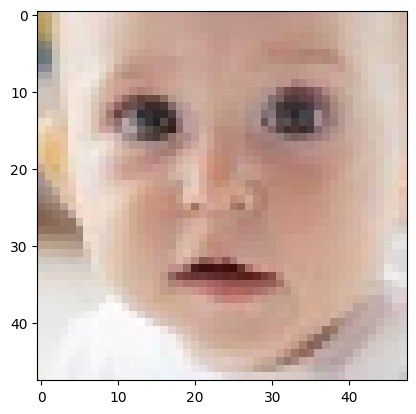

In [ ]:
plt.imshow(images[2])

In [ ]:
image_f = np.array(images)
age_f = np.array(ages)

In [ ]:
print(type(age_f))

<class 'numpy.ndarray'>


In [ ]:
normalize_img = image_f/255

In [ ]:
print(normalize_img[2])

[[[0.74117647 0.62745098 0.41960784]
  [0.75686275 0.66666667 0.4745098 ]
  [0.84313725 0.77647059 0.65882353]
  ...
  [0.84313725 0.79607843 0.74901961]
  [0.81568627 0.75294118 0.69019608]
  [0.8        0.70980392 0.64705882]]

 [[0.73333333 0.61960784 0.37254902]
  [0.75294118 0.65490196 0.44313725]
  [0.8627451  0.77254902 0.65098039]
  ...
  [0.84313725 0.79607843 0.74117647]
  [0.82352941 0.76078431 0.70196078]
  [0.80784314 0.71372549 0.65882353]]

 [[0.69019608 0.60392157 0.37647059]
  [0.74117647 0.65098039 0.45882353]
  [0.87058824 0.78823529 0.67058824]
  ...
  [0.84705882 0.8        0.7372549 ]
  [0.82745098 0.76470588 0.71372549]
  [0.81568627 0.72156863 0.6745098 ]]

 ...

 [[0.93333333 0.93333333 0.93333333]
  [0.9372549  0.9372549  0.9372549 ]
  [0.95294118 0.95294118 0.95294118]
  ...
  [0.83137255 0.82745098 0.81960784]
  [0.84313725 0.83137255 0.81960784]
  [0.85882353 0.85490196 0.85098039]]

 [[0.9372549  0.94117647 0.92156863]
  [0.94509804 0.94509804 0.9372549 ]


In [ ]:
print(normalize_img.shape)

(23708, 48, 48, 3)


In [ ]:
print(normalize_img[2].shape)

(48, 48, 3)


In [ ]:
value , count = np.unique(age_f,return_counts = True)

In [ ]:
print(value)

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  95  96  99 100 101 103 105 110 111 115 116]


In [ ]:
print(count)

[1123  482  289  273  196  131  139  263  166  156   65  130   81  157
  177  247  158  262   98  284  346  395  426  859  734 2197  615  918
  570  724  350  664  143  409  880  483  293  325  266  526  132  266
  157  100  440  153  170  153  148  381  138  232  241  353  268  236
   97  271   82  293  161  125  103   50  259   77   94  100   56  147
   33   98   63   32  148   58   28   69   23  133   22   40   18   24
  155   35   10   34   33   82    2   13    5    9   17    9   11    2
    1    5    5    1    3    4]


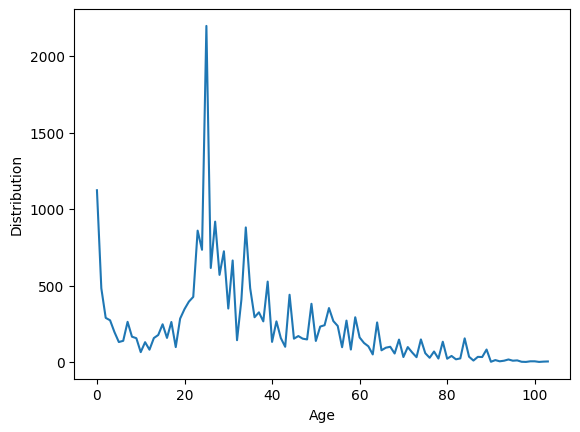

In [ ]:
plt.plot(count)
plt.xlabel('Age')
plt.ylabel('Distribution')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train , X_test , Y_train , Y_test = train_test_split(normalize_img,age_f,test_size=0.2)

In [ ]:
print(Y_train[0:6])

[80 27 55 29  4 22]


In [ ]:
print(type(Y_train))

<class 'numpy.ndarray'>


In [ ]:
from tensorflow.keras.layers import Activation
def Convolution(layer , filters):
    x = Conv2D(filters=filters , kernel_size=(2,2) , padding='same',strides = (1,1) , kernel_regularizer=l2(0.001))(layer)
    x = Dropout(0.1)(x)
    x = Activation('relu')(x)
    return x

In [ ]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Model

def model(input_shape):
    inputs = Input(input_shape)
    conv1 = Conv2D(32, kernel_size=(3, 3), activation='relu')(inputs)
    maxpooling_1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(64, kernel_size=(3, 3), activation='relu')(maxpooling_1)
    maxpooling_2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(128, kernel_size=(3, 3), activation='relu')(maxpooling_2)
    maxpooling_3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    conv4 = Conv2D(256, kernel_size=(3, 3), activation='relu')(maxpooling_3)
    maxpooling_4 = MaxPooling2D(pool_size=(2, 2))(conv4)
    flatten = Flatten()(maxpooling_4)
    dense_1 = Dense(64, activation='relu')(flatten)
    drop_1 = Dropout(0.2)(dense_1)
    output_1 = Dense(1, activation='relu', name='age_output')(drop_1)
    model = Model(inputs=inputs, outputs=output_1)
    model.compile(loss=['mae'], optimizer='Adam', metrics=['accuracy'])
    return model



In [ ]:
Model = model((48,48,3))

In [ ]:
Model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 46, 46, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 23, 23, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 10, 10, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 128)         73856 

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
file_s  ='Age_Detection.h5'
checkpoint = ModelCheckpoint(file_s,monitor='val_loss',verbose=1,save_best_only=True,save_weights_only=False,mode='auto',save_freq='epoch')
Early_stop = tf.keras.callbacks.EarlyStopping(patience=25,monitor='val_loss',restore_best_weights='True')
callback_list= [checkpoint,Early_stop]

In [ ]:
# Train the model.
# Model Started Learning out here.
# batch_size=64 is a one of the hyperparameter that can be tunned
History  = Model.fit(X_train,Y_train,batch_size=64,validation_data=(X_test,Y_test),epochs=250,callbacks=callback_list)


Epoch 1/250
297/297 [==============================] - ETA: 0s - loss: 15.8985 - accuracy: 0.0471
Epoch 1: val_loss improved from inf to 14.19459, saving model to Age_Detection.h5
297/297 [==============================] - 13s 15ms/step - loss: 15.8985 - accuracy: 0.0471 - val_loss: 14.1946 - val_accuracy: 0.0472
Epoch 2/250
 15/297 [>.............................] - ETA: 2s - loss: 13.7485 - accuracy: 0.0531

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


294/297 [============================>.] - ETA: 0s - loss: 13.6949 - accuracy: 0.0472
Epoch 2: val_loss improved from 14.19459 to 12.44730, saving model to Age_Detection.h5
297/297 [==============================] - 2s 8ms/step - loss: 13.6852 - accuracy: 0.0473 - val_loss: 12.4473 - val_accuracy: 0.0458
Epoch 3/250
292/297 [============================>.] - ETA: 0s - loss: 11.8107 - accuracy: 0.0391
Epoch 3: val_loss improved from 12.44730 to 10.88878, saving model to Age_Detection.h5
297/297 [==============================] - 2s 8ms/step - loss: 11.7996 - accuracy: 0.0387 - val_loss: 10.8888 - val_accuracy: 0.0243
Epoch 4/250
292/297 [============================>.] - ETA: 0s - loss: 10.4434 - accuracy: 0.0257
Epoch 4: val_loss improved from 10.88878 to 9.72457, saving model to Age_Detection.h5
297/297 [==============================] - 3s 10ms/step - loss: 10.4411 - accuracy: 0.0255 - val_loss: 9.7246 - val_accuracy: 0.0291
Epoch 5/250
297/297 [==============================] - ETA:

In [ ]:
Model.evaluate(X_test,Y_test)

149/149 [==============================] - 1s 3ms/step - loss: 6.6612 - accuracy: 0.0369


[6.661246299743652, 0.03690426051616669]

In [ ]:
pred = Model.predict(X_test)

149/149 [==============================] - 0s 2ms/step


In [ ]:
pred

array([[14.367762 ],
       [31.300974 ],
       [ 1.2984147],
       ...,
       [40.81962  ],
       [39.706863 ],
       [12.926438 ]], dtype=float32)

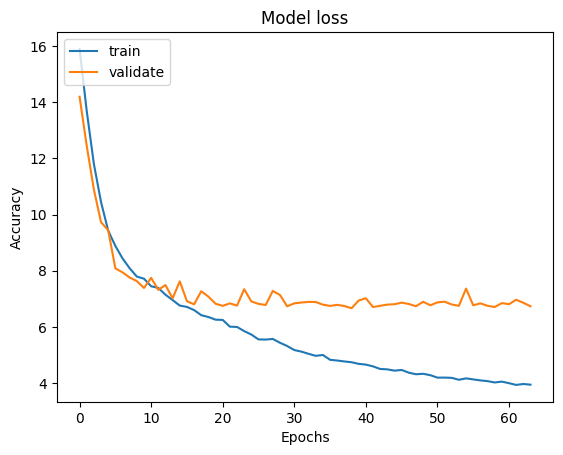

In [ ]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model loss')
plt.legend(['train' , 'validate'] , loc = 'upper left')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
pred_l = []
for i in pred:
  pred_l.append(int(i))

<ipython-input-56-6960d0c86386>:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pred_l.append(int(i))


In [ ]:
print(pred_l)

[14, 31, 1, 27, 22, 22, 65, 64, 29, 10, 21, 8, 34, 28, 51, 4, 41, 14, 32, 1, 64, 22, 38, 1, 1, 61, 22, 21, 43, 37, 66, 33, 24, 50, 33, 31, 31, 22, 0, 11, 9, 7, 22, 36, 24, 33, 26, 48, 77, 113, 1, 20, 3, 1, 29, 29, 33, 41, 26, 25, 28, 54, 66, 46, 50, 23, 26, 36, 27, 32, 0, 43, 36, 37, 37, 19, 25, 20, 90, 33, 30, 21, 44, 26, 0, 29, 54, 29, 25, 25, 26, 23, 16, 27, 80, 31, 0, 27, 28, 73, 26, 24, 26, 26, 21, 53, 32, 31, 23, 29, 66, 91, 25, 44, 68, 60, 34, 30, 33, 30, 28, 1, 39, 11, 29, 30, 26, 25, 10, 25, 25, 1, 25, 43, 4, 34, 3, 22, 36, 49, 0, 43, 31, 26, 54, 27, 0, 32, 2, 38, 25, 45, 38, 31, 21, 0, 42, 9, 31, 30, 63, 31, 35, 26, 33, 26, 38, 2, 28, 30, 66, 24, 62, 2, 42, 57, 30, 2, 30, 63, 40, 42, 32, 29, 23, 2, 23, 0, 38, 65, 52, 43, 28, 38, 31, 4, 8, 27, 25, 26, 25, 1, 58, 82, 50, 19, 42, 25, 24, 20, 47, 73, 64, 30, 8, 42, 23, 2, 56, 47, 37, 30, 23, 29, 39, 14, 32, 25, 0, 33, 17, 41, 24, 26, 20, 19, 32, 16, 0, 16, 57, 0, 2, 26, 45, 28, 21, 33, 33, 84, 7, 48, 40, 1, 25, 21, 15, 27, 52, 26

In [ ]:
report = classification_report(Y_test , pred_l)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [ ]:
results = confusion_matrix(Y_test , pred_l)

In [ ]:
# import seaborn as sns
# sns.heatmap(results, annot=True)

In [ ]:
def test_image(ind , images , normalize_img , Model):
    plt.imshow(images[ind])
    image_test = normalize_img[ind]
    pred_l = Model.predict(np.array([image_test]))
    age = int(np.round(pred_l))
    if age<20:
      print(f"It's a Child.")
    else:
      print(f"It's not a Child.")

1/1 [==============================] - 0s 25ms/step
It's not a Child.


<ipython-input-76-45d41188b8f7>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age = int(np.round(pred_l))


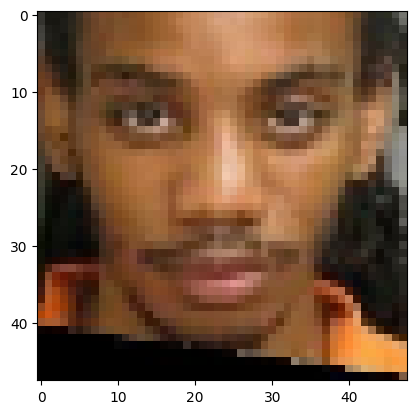

In [ ]:
test_image(5640,images,normalize_img,Model)